In [34]:
import pandas as pd

# Read CSV files
nifty_data = pd.read_csv('nifty_tick_data.csv')
option_chain_data = pd.read_csv('option_chain_tick_data.csv')
print(nifty_data)
print(option_chain_data)

             Timestamp     Open     High      Low    Close  Volume      Bid  \
0  2024-09-19 09:15:01  19950.0  19975.0  19940.0  19965.0    1500  19949.8   
1  2024-09-19 09:15:02  19965.5  19985.5  19960.0  19970.0    1800  19964.9   
2  2024-09-19 09:15:03  19970.0  19990.0  19965.0  19985.0    1700  19969.8   
3  2024-09-19 09:15:04  19985.0  19995.0  19975.0  19990.0    2000  19984.6   
4  2024-09-19 09:15:05  19990.5  20005.0  19980.5  19995.0    2200  19990.2   
5  2024-09-19 09:15:06  20000.0  20010.5  19990.0  20005.0    2500  19999.8   
6  2024-09-19 09:15:07  20005.5  20015.5  19995.0  20010.0    2700  20004.8   
7  2024-09-19 09:15:08  20010.0  20020.5  20000.5  20015.5    2900  20009.9   
8  2024-09-19 09:15:09  20015.5  20025.0  20005.5  20020.0    3100  20014.8   
9  2024-09-19 09:15:10  20020.0  20030.0  20010.0  20025.0    3200  20019.9   

       Ask  
0  19950.5  
1  19965.8  
2  19970.6  
3  19985.2  
4  19991.5  
5  20005.6  
6  20010.5  
7  20015.6  
8  20020.4  


In [35]:
# Nifty Tick Data Descriptive Stats
nifty_stats = nifty_data[['Open', 'Close', 'Volume']].describe()

# Option Chain Data Descriptive Stats
option_chain_stats = option_chain_data[['Strike Price', 'Volume', 'Open Interest']].describe()

print("Nifty Tick Data Statistics:")
print(nifty_stats)

print("\nOption Chain Data Statistics:")
print(option_chain_stats)

Nifty Tick Data Statistics:
               Open         Close       Volume
count     10.000000     10.000000    10.000000
mean   19991.200000  19998.050000  2360.000000
std       23.337143     20.621523   607.728009
min    19950.000000  19965.000000  1500.000000
25%    19973.750000  19986.250000  1850.000000
50%    19995.250000  20000.000000  2350.000000
75%    20008.875000  20014.125000  2850.000000
max    20020.000000  20025.000000  3200.000000

Option Chain Data Statistics:
       Strike Price      Volume  Open Interest
count     10.000000   10.000000      10.000000
mean   20200.000000  155.000000    6930.000000
std      149.071198   30.276504     748.405713
min    20000.000000  110.000000    5400.000000
25%    20100.000000  132.500000    6575.000000
50%    20200.000000  155.000000    7050.000000
75%    20300.000000  177.500000    7425.000000
max    20400.000000  200.000000    7900.000000


In [36]:
# Group by 'Option Type' (Call/Put) and sum 'Volume'
total_volume_by_type = option_chain_data.groupby('Option Type')['Volume'].sum()
print(total_volume_by_type)

Option Type
Call    770
Put     780
Name: Volume, dtype: int64


In [4]:
# Remove rows with missing timestamps or key values
nifty_data_clean = nifty_data.dropna(subset=['Timestamp', 'Open', 'Close', 'Volume'])
option_chain_data_clean = option_chain_data.dropna(subset=['Timestamp', 'Strike Price', 'Volume', 'Open Interest'])

In [5]:
# Define and remove rows with out-of-range values
nifty_data_clean = nifty_data_clean[(nifty_data_clean['Open'] > 0) & (nifty_data_clean['Close'] > 0)]
option_chain_data_clean = option_chain_data_clean[(option_chain_data_clean['Strike Price'] > 0)]

In [6]:
# Convert 'Timestamp' to datetime and ensure it's formatted correctly
nifty_data_clean['Timestamp'] = pd.to_datetime(nifty_data_clean['Timestamp'])
option_chain_data_clean['Timestamp'] = pd.to_datetime(option_chain_data_clean['Timestamp'])

# Ensure sorted data
nifty_data_clean = nifty_data_clean.sort_values('Timestamp')
option_chain_data_clean = option_chain_data_clean.sort_values('Timestamp')

In [38]:
# Filter data
filtered_data = option_chain_data_clean[(option_chain_data_clean['Strike Price'] > 15000) & 
                                        (option_chain_data_clean['Volume'] > 100)]

# Display the first 5 rows
print(filtered_data.head())

            Timestamp  Strike Price Option Type  Bid Price  Ask Price  Volume  \
0 2024-09-19 09:15:01         20000        Call       45.2       46.0     150   
1 2024-09-19 09:15:02         20000         Put       50.1       51.5     200   
2 2024-09-19 09:15:03         20100        Call       30.5       31.2     180   
3 2024-09-19 09:15:04         20100         Put       40.8       41.9     170   
4 2024-09-19 09:15:05         20200        Call       25.6       26.5     190   

   Open Interest  LTP Change  
0           6500         NaN  
1           7100    0.000000  
2           5400    0.005000  
3           6200    0.000000  
4           7000    0.004975  


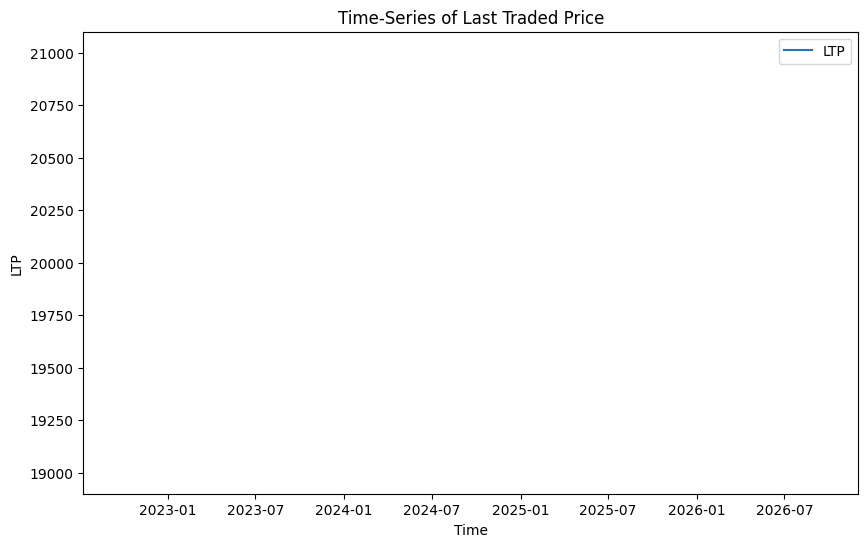

In [40]:
import matplotlib.pyplot as plt

nifty_option = option_chain_data_clean[(option_chain_data_clean['Strike Price'] == 20000) & 
                                       (option_chain_data_clean['Option Type'] == 'Call')]

# Plot LTP over time
plt.figure(figsize=(10,6))
plt.plot(nifty_option['Timestamp'], nifty_option['Strike Price'], label='LTP')
plt.title('Time-Series of Last Traded Price')
plt.xlabel('Time')
plt.ylabel('LTP')
plt.legend()
plt.show()

In [25]:
print(option_chain_data.columns)

Index(['Timestamp', 'Strike Price', 'Option Type', 'Bid Price', 'Ask Price',
       'Volume', 'Open Interest'],
      dtype='object')


In [26]:
print(option_chain_data_clean.columns)

Index(['Timestamp', 'Strike Price', 'Option Type', 'Bid Price', 'Ask Price',
       'Volume', 'Open Interest', 'LTP Change'],
      dtype='object')


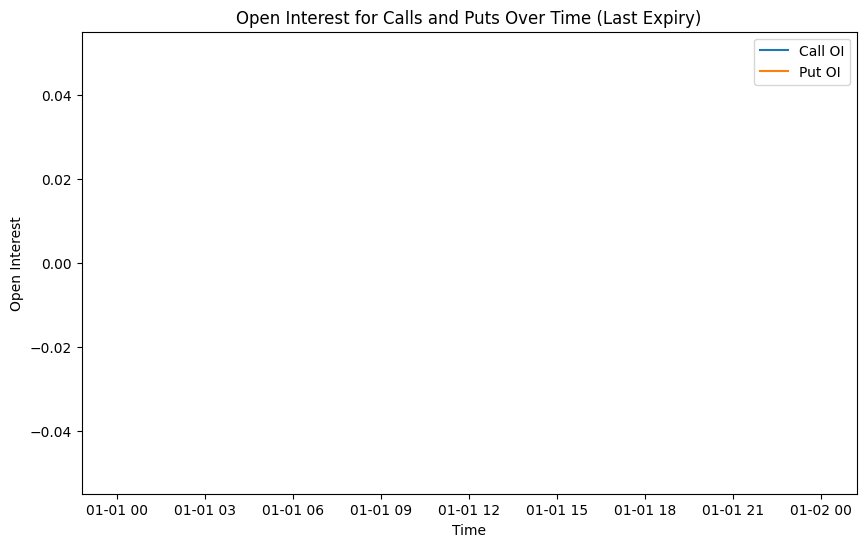

In [31]:
# Filter for the last expiry
last_expiry = option_chain_data_clean['Timestamp'].max()
expiry_data = option_chain_data_clean[option_chain_data_clean['Timestamp'] == last_expiry]

# Plot OI for Calls and Puts
plt.figure(figsize=(10,6))
plt.plot(expiry_data[expiry_data['Option Type'] == 'CE']['Timestamp'], 
         expiry_data[expiry_data['Option Type'] == 'CE']['Open Interest'], label='Call OI')
plt.plot(expiry_data[expiry_data['Option Type'] == 'PE']['Timestamp'], 
         expiry_data[expiry_data['Option Type'] == 'PE']['Open Interest'], label='Put OI')
plt.title('Open Interest for Calls and Puts Over Time (Last Expiry)')
plt.xlabel('Time')
plt.ylabel('Open Interest')
plt.legend()
plt.show()

In [32]:
def backtest_call_option(option_data, threshold_increase=0.05, sell_decrease=0.03):
    option_data['LTP Change'] = option_data['Strike Price'].pct_change()
    buy_signals = option_data[(option_data['LTP Change'] > threshold_increase) &
                              (option_data['Option Type'] == 'CE')]

    # Simulate selling when LTP decreases by 3%
    sell_signals = option_data[(option_data['LTP Change'] < -sell_decrease) & 
                               (option_data.index.isin(buy_signals.index))]
    
    return buy_signals, sell_signals

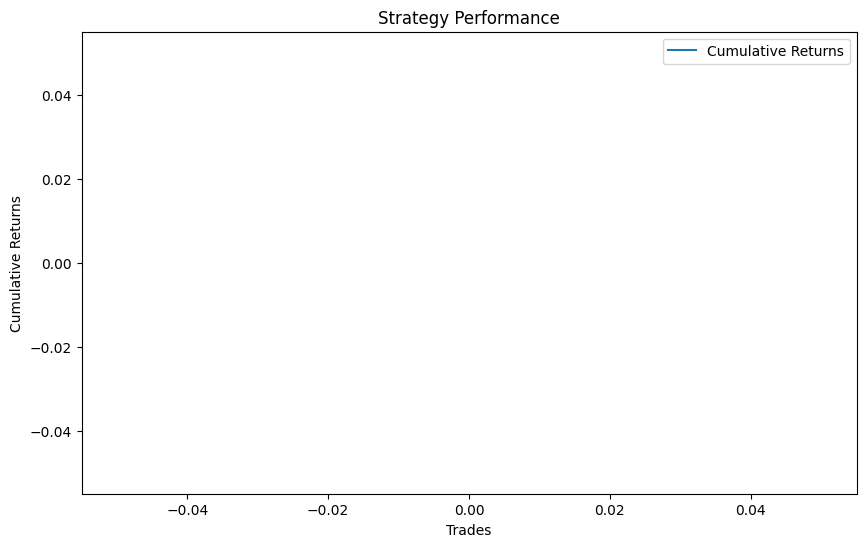

In [33]:
# Simulate performance
buy_signals, sell_signals = backtest_call_option(option_chain_data_clean)

# Calculate profit/loss
profits = (sell_signals['Strike Price'].values - buy_signals['Strike Price'].values)
cumulative_returns = profits.cumsum()

# Plot cumulative returns
plt.figure(figsize=(10,6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.title('Strategy Performance')
plt.xlabel('Trades')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()